Base de dados: Fake and Real News.

Podemos usar esses dados para prever se um artigo é fake ou não? 

Nosso objetivo é classificar os artigos em fake ou true e utilizar um modelo que nos possibilite prever essa classificação
(Uso de LSTM)

Sumário: 
Análise Exploratória 
Modelos Regressão Logística
Modelo ANN 


In [1]:
# Core
import seaborn as sns
#import pandas as pd
import numpy as np

# Visual
import matplotlib.pyplot as plt
import graphviz
import pprint
import pandas as pd

# Sklearn
from sklearn import tree as sk_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.model_selection import train_test_split

In [2]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import nltk
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [4]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

In [5]:
%pwd 

'C:\\Users\\narag\\Downloads'

In [6]:
%cd "C:\Users\narag\Documents\COMPUTADOR NARA\AL_projeto"

C:\Users\narag\Documents\COMPUTADOR NARA\AL_projeto


Inicialmente, resolvemos analisar as duas bases (True e Fake), nesse caso vamos trabalhar com as bases juntas em df, sendo label = 1 quando fake e label = 0 quando true. 

In [7]:
fake_df = pd.read_csv('Fake.csv')
df_fake = fake_df.copy()

In [8]:
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [9]:
df_fake['label'] = 1

In [10]:
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      1  
1  December 31, 2017      1  
2  December 30, 2017      1  
3  December 29, 2017      1  
4  December 25, 2017      1

In [11]:

true_df = pd.read_csv('True.csv')
df_true = true_df.copy()

In [12]:
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [13]:
df_true['label'] = 0
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       0  
1  December 29, 2017       0  
2  December 31, 2017       0  
3  December 30, 2017       0  
4  December 29, 2017       0

In [14]:
df= pd.concat([df_true, df_fake]).reset_index(drop = True)

df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date  label  
0      December 31, 2017       0  
1      December 29, 2017       0  
2      December 31, 2017       0  
3      December 30, 2017       0  
4      December 29, 2017       0  
...                   ...    ...  
44893    January 16, 2016      1  
44894    January 16, 2016      1  
44895    January 15, 2016      1  
44896    January 14, 2016      1  
44897    January 12, 2016      1  

[44898 rows x 5 columns]

Aqui, notamos o nosso tipo de variável (strings), a ausência de valores nulos e a boa distribuição das observações em relação às targets

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [16]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [17]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

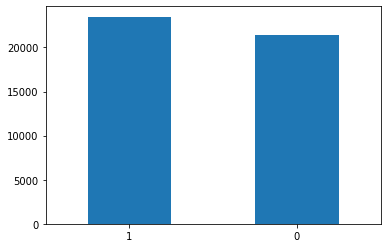

In [18]:
#distribuição de target
df["label"].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 360);

Agora, vamos propor algumas análises referentes às nossas variáveis. Primeiro, demonstraremos a distribuição de notícias fakes ou não de acordo com a temática da notícia. Nesse caso, encontramos uma maior concentração de notícias verdadeiras referentes a politics News e World News. Em seguida, mostramos como as notícias foram distribuídas em relação aos anos, pontuando uma maior concentração de notícias fakes em 2016 (Ano de eleição nos Estados Unidos). Também mostramos as palavras mais usadas em relação a cada tipo de notícia em wordclouds. Também pontuamos como as notícias se comportam em relação ao número de caracteres, identificando que notícias falsas apresentam maiores quantidades. 

In [19]:
#Distribuição das notícias por tema
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

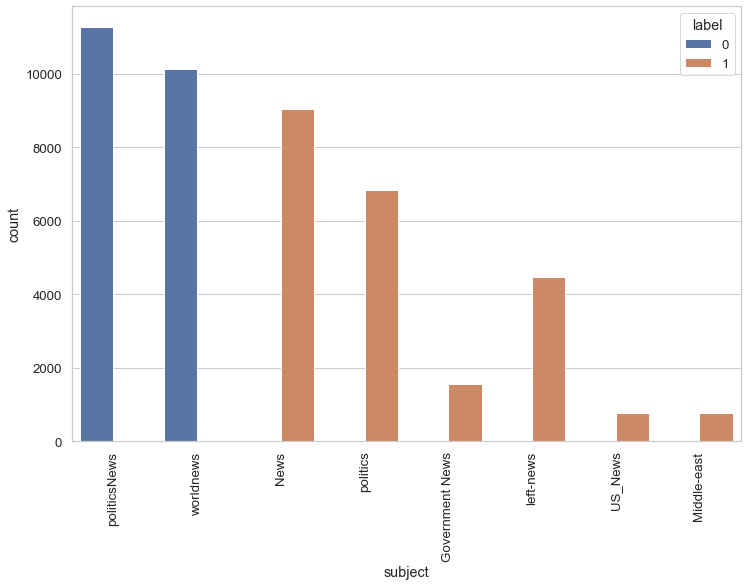

In [20]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "label", data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

politicsNews e politics tratam do mesmo tema

Inicialmente, resolvemos mudar o formato da coluna de datas, para simplificar. Também tiramos todas as observações duplicadas e limpamos as stopwords que aparecem nas notícias. Assim, criamos uma nova coluna com as informações mais limpas, identificada como Cleaned Full Text. Além disso, notamos que a presença de palavras como Reuters, que explicita a fonte da notícia pode apresentar um viés na nossa análise, por isso também decidimos apagar todas as palavras reuters ou que envolvessem o nome de alguma capital.  

In [21]:
del_url = "http"
filter1 = df['date'].str.contains(del_url)

In [22]:
df = df[~filter1]

In [23]:
#Mudando o formato das datas
date_pattern = "Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec"
filter = df['date'].str.contains(date_pattern)

In [24]:
df=df[filter]

In [25]:
df['date'] = pd.to_datetime(df['date'])
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews 2017-12-31   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews 2017-12-29   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews 2017-12-31   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews 2017-12-30   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews 2017-12-29   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

In [26]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews 2017-12-31   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews 2017-12-29   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews 2017-12-31   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews 2017-12-30   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews 2017-12-29   

   label  Year  Month  
0      0  2017     12  
1      0  2017     12  
2      0  2017     12  
3      0  2017     12  
4      0  2017     12

In [27]:
df[df.duplicated()]

title  \
445    Senate tax bill stalls on deficit-focused 'tri...   
778    Trump warns 'rogue regime' North Korea of grav...   
892    Republicans unveil tax cut bill, but the hard ...   
896    Trump taps Fed centrist Powell to lead U.S. ce...   
974    Two ex-Trump aides charged in Russia probe, th...   
...                                                  ...   
21353  Thailand's ousted PM Yingluck has fled abroad:...   
21408  U.S., North Korea clash at U.N. forum over nuc...   
31359  HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...   
32863  FORMER DEMOCRAT WARNS Young Americans: “Rioter...   
36342  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...   

                                                    text       subject  \
445    WASHINGTON (Reuters) - The U.S. Senate on Thur...  politicsNews   
778    BEIJING (Reuters) - U.S. President Donald Trum...  politicsNews   
892    WASHINGTON (Reuters) - U.S. House of Represent...  politicsNews   
896    WASHINGTON (Reuters) - President Donald Trump ...  politicsNews   
974    WASHINGTON (Reuters) - Federal investigators p...  politicsNews   
...                                                  ...           ...   
21353  BANGKOK (Reuters) - Ousted Thai prime minister...     worldnews   
21408  GENEVA (Reuters) - North Korea and the United ...     worldnews   
31359  No time to waste   we've got to fight with eve...      politics   
32863   Who is silencing political speech, physically...      politics   
36342  They were probably just looking for a  safe sp...      politics   

            date  label  Year  Month  
445   2017-11-30      0  2017     11  
778   2017-11-08      0  2017     11  
892   2017-11-02      0  2017     11  
896   2017-11-02      0  2017     11  
974   2017-10-30      0  2017     10  
...          ...    ...   ...    ...  
21353 2017-08-25      0  2017      8  
21408 2017-08-22      0  2017      8  
31359 2017-09-09      1  2017      9  
32863 2017-03-10      1  2017      3  
36342 2015-11-16      1  2015     11  

[209 rows x 7 columns]

In [28]:
df = df.drop_duplicates()

In [29]:
len(df)

44679

[Text(0, 0, '2015'),
 Text(1, 0, '2016'),
 Text(2, 0, '2017'),
 Text(3, 0, '2018')]

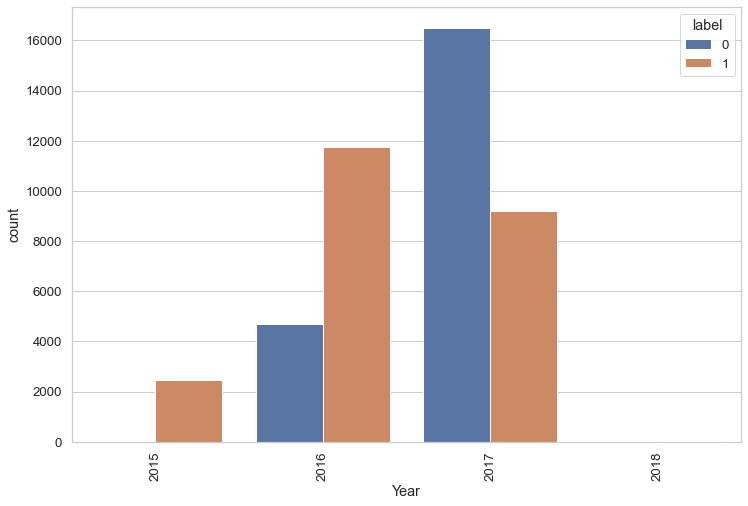

In [30]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "Year", hue = "label", data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [31]:
df_fake= df[df["label"]==1]
df_real= df[df["label"]==0]

In [32]:
df_fake= df_fake.groupby(['date'])['label'].count()


Limpando a base

In [33]:
df['full_text']= df['title']+ ' ' + df['text']

In [34]:
import re
import nltk as nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\narag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\narag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
corpus=[]
full_text = df['full_text'].str.split() # capturar todas as palavras
full_text = full_text.values.tolist() # criar lista
corpus=[word for i in full_text for word in i]

In [37]:
countries_capital_df = pd.read_csv('country-list.csv')
df_capitals = countries_capital_df.copy()

In [38]:
df_capitals.head()

country              capital            type
0               Abkhazia              Sukhumi  countryCapital
1            Afghanistan                Kabul  countryCapital
2  Akrotiri and Dhekelia  Episkopi Cantonment  countryCapital
3                Albania               Tirana  countryCapital
4                Algeria              Algiers  countryCapital

In [39]:
capitals = df_capitals['capital']

In [40]:
lista_capitals = df_capitals['capital'].tolist()

In [41]:
def clean_text(text):
    if type(text) == np.float:
        return ""
    text = text.replace("Reuters","")
    text = text.replace(r'[()]+', '')
    text = text.lower() 
    text = re.sub("'", "", text) 
    text = re.sub('(?:https?|ftp):\/\/?[\w/\-?=%.]+\.[\w/\-&?=%.]+'," ",text)
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub("[^a-z0-9]"," ", text)
    text = text.split()
    text = [w for w in text if w not in lista_capitals]
    text = [w for w in text if not w in stop]
    text = " ".join(word for word in text)
    return text

In [42]:
df['cleaned_full_text']= [clean_text(text) for text in df['full_text'] ]

In [43]:
print(df['full_text'][3])

FBI Russia probe helped by Australian diplomat tip-off: NYT WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the meeting, Australian officials passed the information that came from Papadopoulos to their American counterparts when leaked Democratic emails began appearing online, according to the newspaper, which cited four current and former U.S. and foreign officials. Besides the information from the Australians, the probe by the Federal Bureau of Investigation was also propelled by intelligence from other friendly governments, including the British an

In [44]:
print(df['cleaned_full_text'][3])

fbi russia probe helped australian diplomat tip nyt washington trump campaign adviser george papadopoulos told australian diplomat may 2016 russia political dirt democratic presidential candidate hillary clinton new york times reported saturday conversation papadopoulos diplomat alexander downer london driving factor behind fbi decision open counter intelligence investigation moscow contacts trump campaign times reported two months meeting australian officials passed information came papadopoulos american counterparts leaked democratic emails began appearing online according newspaper cited four current former u foreign officials besides information australians probe federal bureau investigation also propelled intelligence friendly governments including british dutch times said papadopoulos chicago based international energy lawyer pleaded guilty oct 30 lying fbi agents contacts people claimed ties top russian officials first criminal charge alleging links trump campaign russia white h

In [45]:
df_fake= df[df["label"]==1]
df_real= df[df["label"]==0]

In [46]:
list_fake_news = []
list_fake_news.append(df_fake['cleaned_full_text'])
corpus_fake_news=[word for i in list_fake_news for word in i]

In [47]:
unique_string_fake=(" ").join(corpus_fake_news)

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

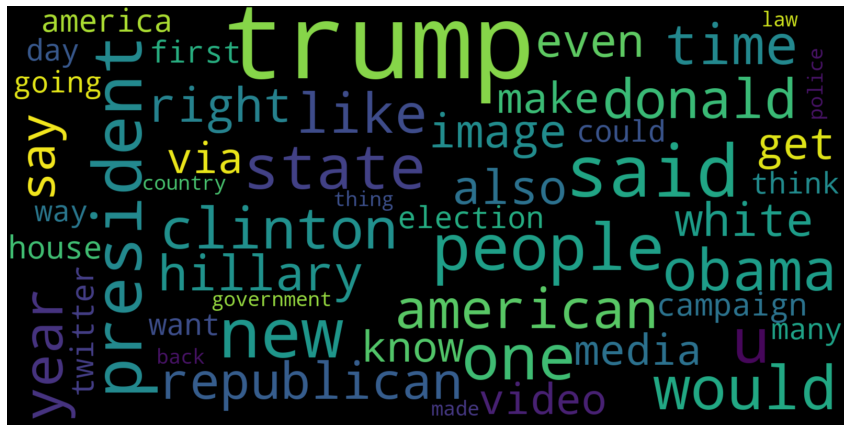

In [49]:
wordcloud = WordCloud(width=1600, stopwords=stop,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(unique_string_fake)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [50]:
list_real_news = []
list_real_news.append(df_real['cleaned_full_text'])
corpus_real_news=[word for i in list_real_news for word in i]

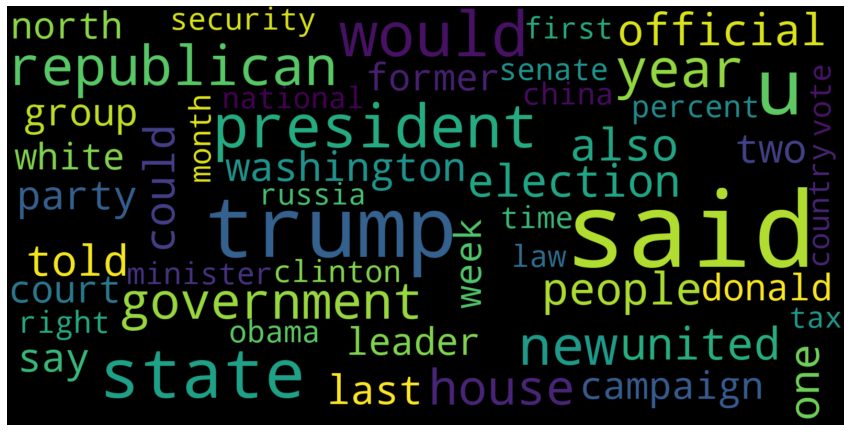

In [51]:
unique_string_real=(" ").join(corpus_real_news)
wordcloud = WordCloud(width=1600, stopwords=stop,height=800,max_font_size=200,max_words=50,collocations=False, background_color='black').generate(unique_string_real)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

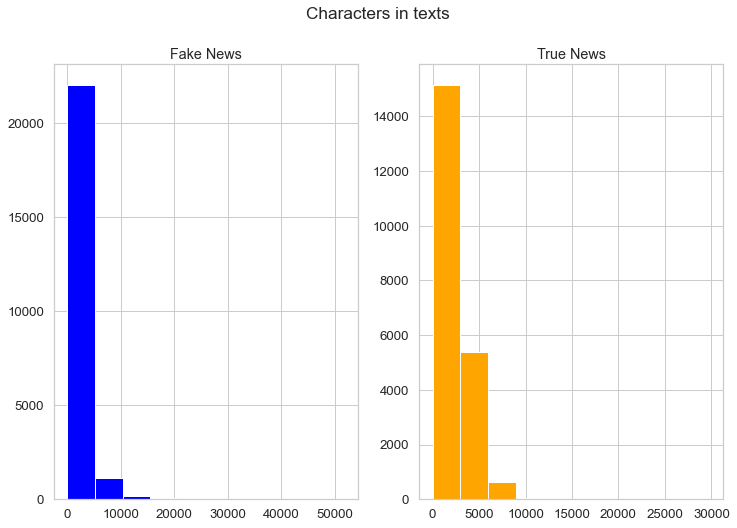

In [52]:
#Número de caracteres utilizados em cada tipo de notícia 

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['label']==1]['text'].str.len()
ax1.hist(text_len,color='blue')
ax1.set_title('Fake News')
text_len=df[df['label']==0]['text'].str.len()
ax2.hist(text_len,color='orange')
ax2.set_title('True News')
fig.suptitle('Characters in texts')
plt.show()

In [53]:
maxlen = -1
for doc in df.cleaned_full_text:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a News Content is =", maxlen)
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.cleaned_full_text], nbins = 50)
fig.show()

The maximum number of words in a News Content is = 5082


Nesse caso, resolvemos rodar uma regressão logística para identificar o comportamento inicial da relação pontuada e como afeta a categorização das notícias. Primeiro textamos com o texto limpo, depois apenas com os títulos e, por último, apenas com o texto. Assim, temos: 

In [54]:
y = df['label']
x = df['cleaned_full_text']

In [55]:
x.shape[0]

44679

In [56]:
y.shape[0]

44679

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [58]:
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [59]:
vec_train = CountVectorizer().fit(x_train)
x_vec_train = vec_train.transform(x_train)
x_vec_test = vec_train.transform(x_test)
model = LogisticRegression(C=2.5)
model.fit(x_vec_train, y_train)
predicted_value = model.predict(x_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9880908044896441


In [60]:
x_vec_train.shape[0]

35743

In [61]:
y_train.shape[0]

35743

<AxesSubplot:>

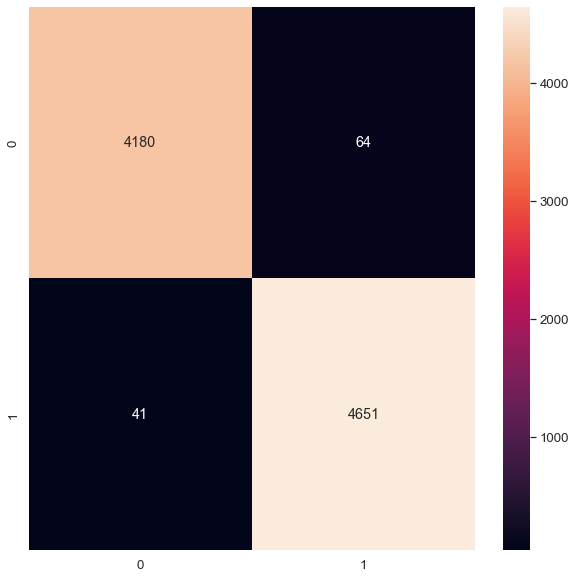

In [62]:
prediction = []
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g')

In [63]:
y = df['label']
x = df['title']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [65]:
vec_train = CountVectorizer().fit(x_train)
x_vec_train = vec_train.transform(x_train)
x_vec_test = vec_train.transform(x_test)
model = LogisticRegression(C=2.5)
model.fit(x_vec_train, y_train)
predicted_value = model.predict(x_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9696989601889192


<AxesSubplot:>

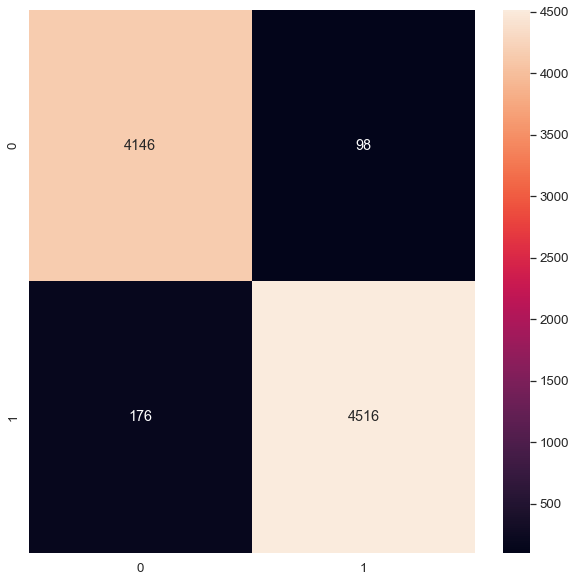

In [66]:
prediction = []
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g')

In [67]:
y = df['label']
x = df['text']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [69]:
vec_train = CountVectorizer().fit(x_train)
x_vec_train = vec_train.transform(x_train)
x_vec_test = vec_train.transform(x_test)
model = LogisticRegression(C=2.5)
model.fit(x_vec_train, y_train)
predicted_value = model.predict(x_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9979356041888132


<AxesSubplot:>

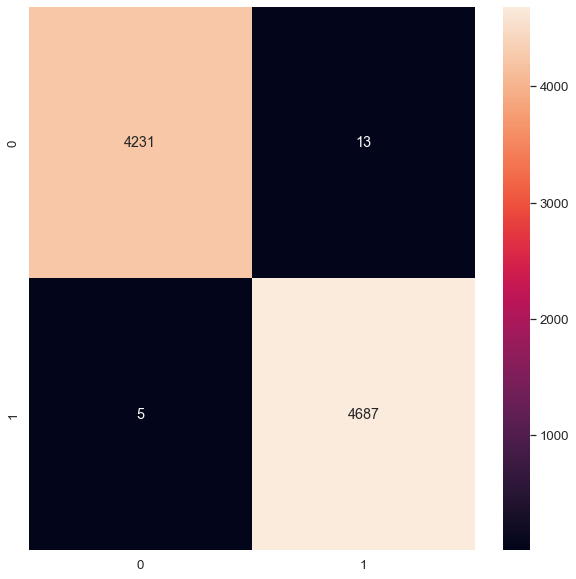

In [81]:
prediction = []
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g')


Agora, vamos rodar um modelo neural, com intuito de possibilitar um aprendizado profundo sobre os artigos e sua classificação. Escolhemos o ANN devido a nossa base que trabalha com textos e porque é um modelo que permite generalização, inferindo relações ou dados não vistos, possibilitando uma previsão com base nos dados apresentados e não apresentados. Por fim, como o modelo ANN não impõe restrições sobre as variáveis inputs, isto é, não precisam ser distribuídas de uma maneira específica para o modelo, optamos por essa decisão.  


Fazendo o modelo ANN

In [81]:
features = 3000

In [83]:
cv = CountVectorizer(max_features = features)
X = cv.fit_transform(df['cleaned_full_text'])
y = df['label'].values


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size = 0.50, random_state = 0)

Epoch 1/12
63/63 [==============================] - 23s 327ms/step - loss: 0.1764 - accuracy: 0.9428 - val_loss: 0.0663 - val_accuracy: 0.9854
Epoch 2/12
63/63 [==============================] - 19s 306ms/step - loss: 0.0333 - accuracy: 0.9948 - val_loss: 0.0503 - val_accuracy: 0.9893
Epoch 3/12
63/63 [==============================] - 20s 312ms/step - loss: 0.0145 - accuracy: 0.9989 - val_loss: 0.0468 - val_accuracy: 0.9881
Epoch 4/12
63/63 [==============================] - 19s 310ms/step - loss: 0.0068 - accuracy: 0.9997 - val_loss: 0.0480 - val_accuracy: 0.9878
Epoch 5/12
63/63 [==============================] - 20s 311ms/step - loss: 0.0038 - accuracy: 0.9999 - val_loss: 0.0489 - val_accuracy: 0.9873
Epoch 6/12
63/63 [==============================] - 20s 314ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.0518 - val_accuracy: 0.9876
Epoch 7/12
63/63 [==============================] - 20s 320ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0525 - val_accuracy: 0.9873

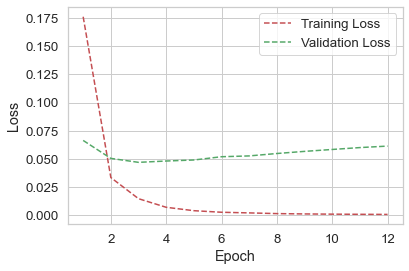

210/210 [==============================] - 3s 10ms/step
--------------------------------------------
Printing classification_report for Test Set
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3179
           1       0.99      0.99      0.99      3523

    accuracy                           0.99      6702
   macro avg       0.99      0.99      0.99      6702
weighted avg       0.99      0.99      0.99      6702

--------------------------------------------


In [85]:
model = Sequential()


model.add(Dense(features, kernel_initializer='uniform',activation = 'relu', input_dim = features))
model.add(Dense(1,kernel_initializer='uniform',activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train.toarray(), y_train, batch_size = 500, epochs = 12, validation_data=(X_test1.toarray(), y_test1))

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

epoch_count = range(1, len(train_loss) + 1)

import matplotlib.pyplot as plt


plt.plot(epoch_count, train_loss, 'r--')
#plt.plot(epoch_count, accuracy_val, 'b-')
plt.plot(epoch_count, validation_loss, 'g--')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();



y_pred = model.predict(X_test2.toarray())
y_pred = (y_pred > 0.5)

print("--------------------------------------------")
print("Printing classification_report for Test Set")    
from sklearn.metrics import classification_report
print (classification_report(y_test2, y_pred))
print("--------------------------------------------")

<AxesSubplot:>

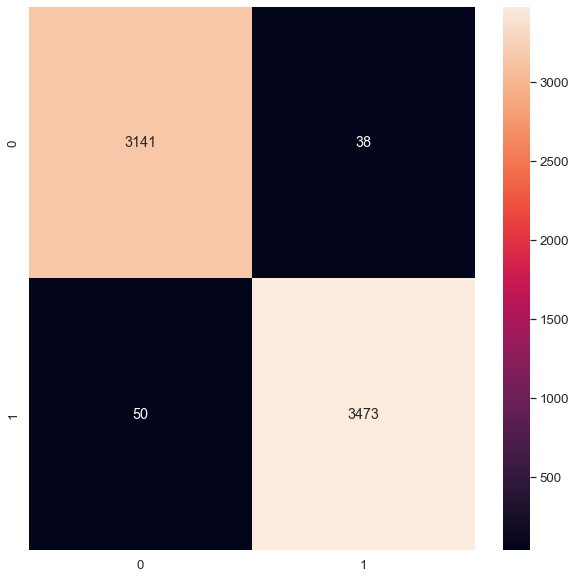

In [87]:
cm = confusion_matrix(y_pred = y_pred, y_true = y_test2)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g')

Com o gráfico apresentado, podemos mostrar que quando rodamos com a base de teste, ficou evidente uma melhoria da previsão e diminuição dos erros no modelo rodado.  